# Population Stability Index

## **Definition**  
The **Population Stability Index (PSI)** is a statistical measure used to compare the distribution of a variable between two different populations or time periods. It is commonly used in **credit risk modeling**, **marketing analytics**, and **machine learning model monitoring** to detect changes in data distribution over time.

PSI quantifies how much a variable’s distribution in a **current dataset** differs from a **reference dataset (expected or baseline dataset)**. A high PSI value suggests a significant shift, indicating possible **data drift, model degradation, or changes in the population**.

---

## **Formula for PSI**
The formula for **Population Stability Index** is:

$$
PSI = \sum_{i=1}^{n} (P_i - Q_i) \times \ln \left( \frac{P_i}{Q_i} \right)
$$

Where:
- $ P_i $ = proportion of observations in bin $ i $ in the **current dataset**
- $ Q_i $ = proportion of observations in bin $ i $ in the **reference dataset**
- $ \ln $ = natural logarithm
- $ n $ = total number of bins

---

## **Steps to Calculate PSI**
1. **Define the Variable & Datasets**  
   - Choose the variable to monitor.
   - Identify the **reference dataset** (historical or expected distribution).
   - Identify the **current dataset** (new data for comparison).

2. **Create Bins (Buckets)**
   - Divide the variable's values into bins (e.g., equal frequency, equal width, or custom bins).
   - The same binning strategy should be used for both datasets.

3. **Calculate Proportions**
   - Compute the percentage of observations in each bin for both datasets:
     $$
     P_i = \frac{\text{count in bin } i \text{ (current)}}{\text{total count (current)}}
     $$
     $$
     Q_i = \frac{\text{count in bin } i \text{ (reference)}}{\text{total count (reference)}}
     $$

4. **Compute PSI for Each Bin**
   - Apply the PSI formula for each bin.

5. **Sum Up the PSI Values Across Bins**
   - The total PSI is obtained by summing up the individual bin PSI values.

---

## **Interpreting PSI Values**
| **PSI Value**  | **Interpretation** |
|---------------|--------------------|
| **< 0.1**     | No significant shift (Stable distribution) |
| **0.1 - 0.25** | Moderate shift (Possible data drift) |
| **> 0.25**    | Significant shift (High data drift—investigation needed) |

A high PSI indicates that the data distribution has changed significantly, which could lead to **model performance degradation** or **incorrect business decisions**.

---

## **Use Cases of PSI**
1. **Credit Risk Modeling**  
   - Monitoring shifts in **borrower credit scores** or **loan application characteristics** over time.
   - Ensuring a **credit scoring model** remains effective.

2. **Fraud Detection & Compliance**  
   - Identifying unusual patterns in **transaction behavior**.
   - Detecting **anomalies in financial activity**.

3. **Machine Learning Model Monitoring**  
   - Checking if the **feature distributions** have changed from training to production.
   - Preventing **model drift** in real-world deployments.

4. **Marketing & Customer Segmentation**  
   - Tracking changes in **customer demographics** and **purchase behavior**.
   - Ensuring **marketing models remain effective**.

---

## **Example Calculation**
### **Scenario:**  
Suppose we are monitoring a **credit score distribution** between the **reference period** and the **current period**.

| **Credit Score Bin** | **Reference % (Q)** | **Current % (P)** | **PSI Component** |
|----------------------|--------------------|------------------|----------------|
| 300 - 500          | 10%                | 8%              | $ (0.08 - 0.10) \times \ln(0.08/0.10) $ |
| 500 - 700          | 50%                | 45%             | $ (0.45 - 0.50) \times \ln(0.45/0.50) $ |
| 700 - 850          | 40%                | 47%             | $ (0.47 - 0.40) \times \ln(0.47/0.40) $ |

Summing up all PSI components, we get a **total PSI** (e.g., 0.15), indicating a moderate shift.

---

## **Key Considerations & Best Practices**
- **Bin Selection Matters**: Unequal bins can distort results.
- **Small Sample Sizes Can Skew PSI**: If counts in bins are too low, the PSI calculation may be misleading.
- **Check for Business Context**: Even if PSI suggests a change, it should be investigated in the context of external factors like market shifts.

---

## **Conclusion**
PSI is a powerful tool for detecting data shifts over time. Regularly calculating PSI can **help maintain model accuracy, ensure compliance, and improve decision-making**. If PSI is high, **further investigation** or **model recalibration** may be required.


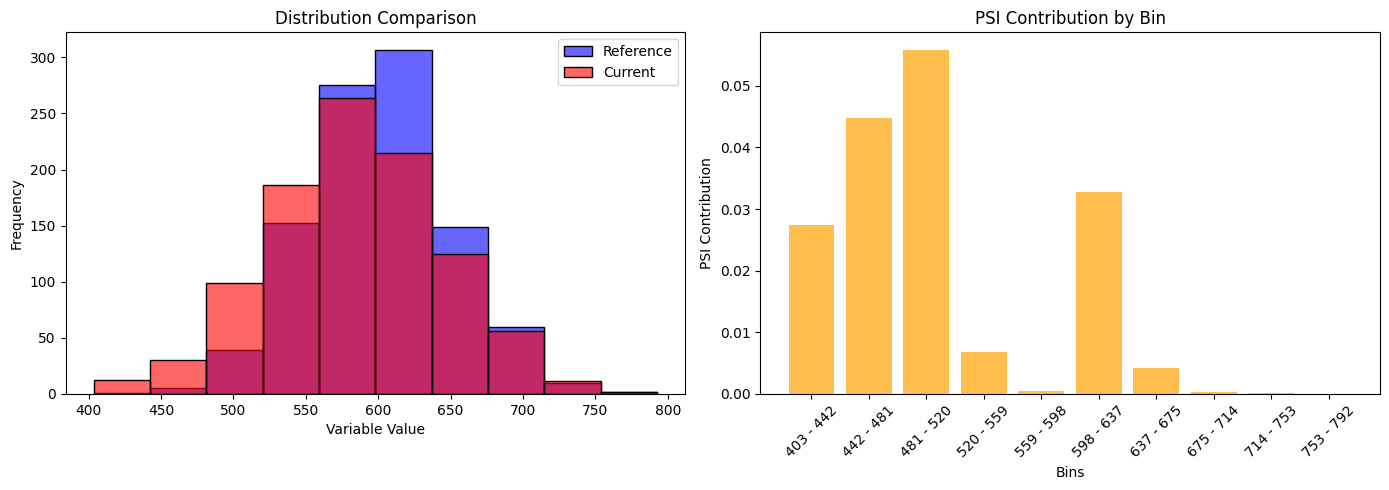


Population Stability Index (PSI): 0.1727
Moderate shift (Possible data drift)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_psi(expected, actual, bins=10, visualize=True):
    """
    Calculate and visualize Population Stability Index (PSI).
    
    Parameters:
    expected (array-like): The reference (expected) distribution.
    actual (array-like): The current (observed) distribution.
    bins (int or list): Number of bins or custom bin edges.
    visualize (bool): Whether to generate visualizations.
    
    Returns:
    float: PSI value indicating the stability of the population.
    """
    # Define bin edges
    bin_edges = np.linspace(min(min(expected), min(actual)), max(max(expected), max(actual)), bins+1)
    
    # Compute bin counts
    expected_counts, _ = np.histogram(expected, bins=bin_edges)
    actual_counts, _ = np.histogram(actual, bins=bin_edges)
    
    # Convert to proportions
    expected_percents = expected_counts / expected_counts.sum()
    actual_percents = actual_counts / actual_counts.sum()
    
    # Avoid division by zero
    expected_percents = np.where(expected_percents == 0, 0.0001, expected_percents)
    actual_percents = np.where(actual_percents == 0, 0.0001, actual_percents)
    
    # Compute PSI for each bin
    psi_values = (expected_percents - actual_percents) * np.log(expected_percents / actual_percents)
    
    # Sum PSI values
    psi = np.sum(psi_values)

    # Visualization
    if visualize:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # Histogram Plot
        sns.histplot(expected, bins=bin_edges, color='blue', alpha=0.6, label="Reference", ax=axes[0])
        sns.histplot(actual, bins=bin_edges, color='red', alpha=0.6, label="Current", ax=axes[0])
        axes[0].set_title("Distribution Comparison")
        axes[0].set_xlabel("Variable Value")
        axes[0].set_ylabel("Frequency")
        axes[0].legend()

        # PSI Contribution Plot
        bin_labels = [f"{int(bin_edges[i])} - {int(bin_edges[i+1])}" for i in range(len(bin_edges)-1)]
        axes[1].bar(bin_labels, psi_values, color='orange', alpha=0.7)
        axes[1].set_title("PSI Contribution by Bin")
        axes[1].set_xlabel("Bins")
        axes[1].set_ylabel("PSI Contribution")
        axes[1].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

    return psi

# Generate synthetic data
np.random.seed(42)
reference_data = np.random.normal(600, 50, 1000)  # Reference (baseline) credit scores
current_data = np.random.normal(580, 60, 1000)   # Current credit scores (shifted)

# Calculate and visualize PSI
psi_score = calculate_psi(reference_data, current_data, bins=10, visualize=True)

# Display results
print(f"\nPopulation Stability Index (PSI): {psi_score:.4f}")

# Interpret the result
if psi_score < 0.1:
    print("No significant shift (Stable distribution)")
elif psi_score < 0.25:
    print("Moderate shift (Possible data drift)")
else:
    print("Significant shift (Investigate further)")

PSI Calculation Function
 * Binning: Uses np.histogram() to count occurrences in bins.
 * Proportion Calculation: Converts counts into percentages.
 * PSI Formula Application: Computes the PSI for each bin and sums up the values.

Interpreting the Results
* If PSI < 0.1, the distribution is stable.
* If PSI is 0.1 - 0.25, there is moderate shift.
* If PSI > 0.25, a significant shift has occurred.

Histogram (Left Plot)
 * Blue bars represent the reference dataset.
 * Red bars represent the current dataset.
 * This helps visually compare the distributions to spot shifts.

PSI Contribution by Bin (Right Plot)
 * Each bar represents the PSI value per bin.
 * If certain bins contribute significantly, they indicate where drift is happening.